In [23]:
import matplotlib.pyplot as plt 
import pandas as pd 

df = pd.read_csv('~/Downloads//archive/Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [24]:
# Print all column names in the DataFrame
print(df.columns)

# Print the number of rows and columns in the DataFrame (shape: [rows, columns])
print(df.shape)

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')
(129880, 23)


Text(0.5, 1.0, 'Customer Gender')

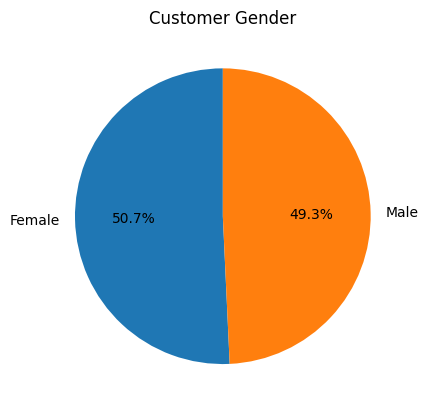

In [25]:
# Count the number of customers by gender
o = df['Gender'].value_counts()

# Create a pie chart to visualize gender distribution
plt.pie(o, labels=o.index, autopct='%1.1f%%',startangle=90)
plt.title("Customer Gender") 

Min: 7
Max: 85


Text(0.5, 1.0, 'Age Distribution')

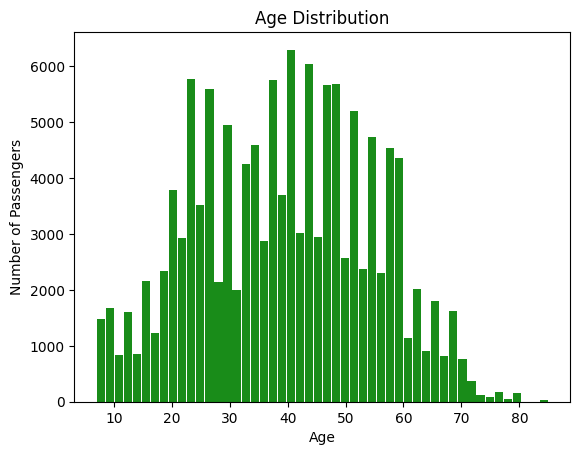

In [26]:
# Find the minimum and maximum age in the dataset
min_value = df['Age'].min()
max_value = df['Age'].max()

print(f"Min: {min_value}")
print(f"Max: {max_value}")

# Plot a histogram to show the distribution of passenger ages
plt.hist(df['Age'], color='green', bins=50, alpha=.9, rwidth=.9)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution")

Analysis 1: Which service categories received the highest or lowest evaluations?

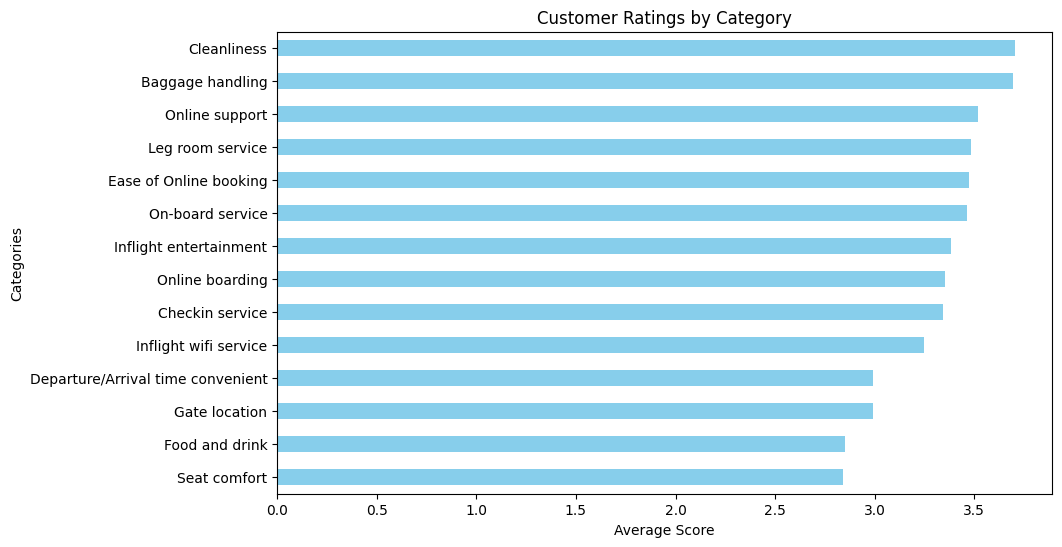

In [27]:
#Calculate the average rating for each service category
df_mean = df.drop(columns=["satisfaction", "Gender", "Customer Type", "Age","Type of Travel",
 "Class", "Flight Distance", "Departure Delay in Minutes","Arrival Delay in Minutes"]).mean()

# Create a horizontal bar chart to visualize average customer ratings
plt.figure(figsize=(10, 6))  
df_mean.sort_values().plot(kind="barh", color="skyblue", figsize=(10, 6))  
plt.xlabel("Average Score") 
plt.ylabel("Categories") 
plt.title("Customer Ratings by Category")  

plt.show()

Analysis 2: Does satisfaction vary by travel class?

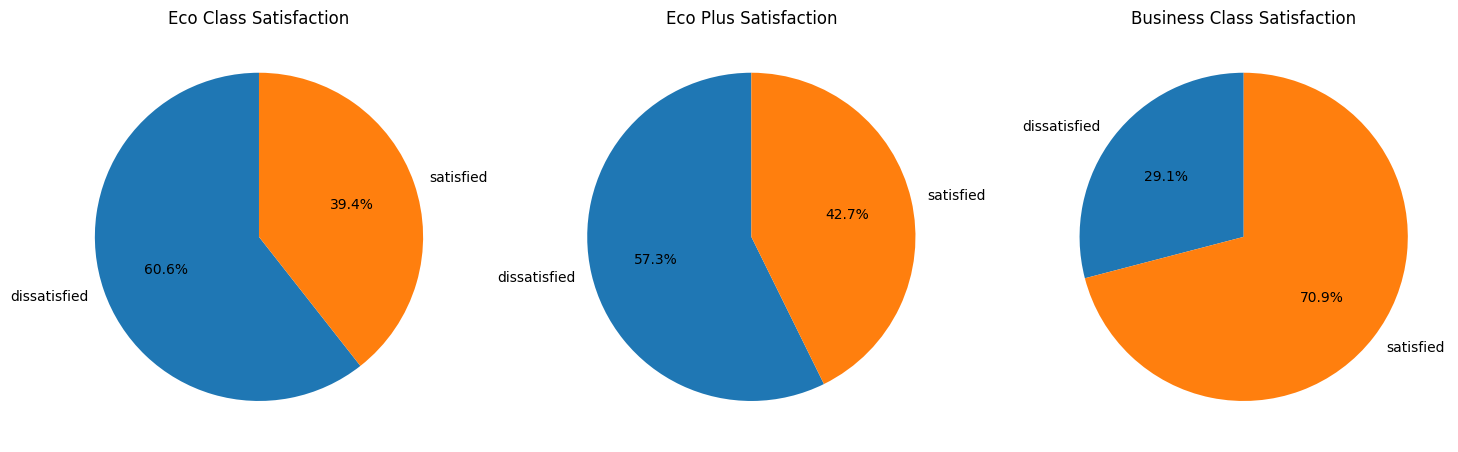

In [28]:
# Count the number of satisfaction responses grouped by travel class
class_satisfaction = df.groupby(['Class', 'satisfaction']).size()

# Reshape the data to have satisfaction categories as separate columns
class_satisfaction = class_satisfaction.unstack(fill_value=0)

# Specify the order of satisfaction categories 
class_satisfaction = class_satisfaction.reindex(columns=['dissatisfied','satisfied'], fill_value=0)

# Calculate the percentage of each satisfaction level within each class
class_satisfaction_percentage = class_satisfaction.apply(lambda x: x / x.sum() * 100, axis=1)

# Create side-by-side pie charts for each travel class
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for Economy Class
eco_data = class_satisfaction_percentage.loc['Eco']
axes[0].pie(eco_data, labels=eco_data.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Eco Class Satisfaction')

# Pie chart for Economy Plus Class
eco_plus_data = class_satisfaction_percentage.loc['Eco Plus']
axes[1].pie(eco_plus_data, labels=eco_plus_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Eco Plus Satisfaction')

# Pie chart for Business Class
business_data = class_satisfaction_percentage.loc['Business']
axes[2].pie(business_data, labels=business_data.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Business Class Satisfaction')

# Show the plots
plt.show()

Analysis 3: Do in-flight service evaluations vary by class?
(This analysis aims to examine whether the extra services offered in Economy Plus and Business Class are effectively meeting passengers' expectations, based on their evaluations of various in-flight services.)

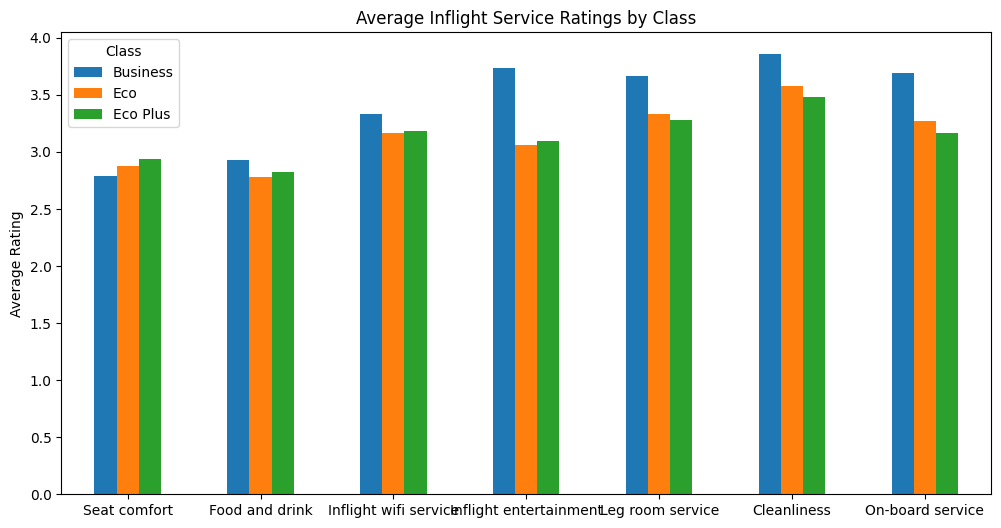

In [29]:
# Calculate the average rating of each inflight service, grouped by travel class
inflight_services = df.groupby('Class')[["Seat comfort", "Food and drink", "Inflight wifi service", "Inflight entertainment","Leg room service",
 "Cleanliness", "On-board service"]].mean()

# Transpose the DataFrame and create a grouped bar chart
inflight_services.T.plot(kind="bar", figsize=(12, 6)) 

# Set chart title and axis labels
plt.title("Average Inflight Service Ratings by Class")
plt.ylabel("Average Rating")
plt.xticks(rotation=360) 
plt.legend(title="Class")

# Show the plot
plt.show()

Analysis 4: Is seat comfort correlated with any other category?

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


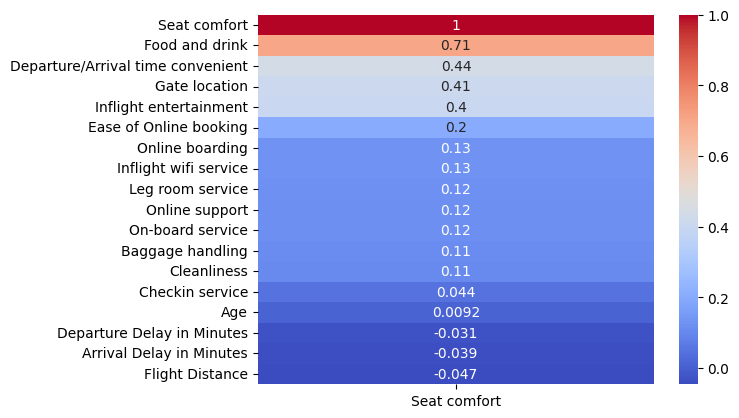

In [30]:
# Install seaborn for advanced visualizations
%pip install seaborn

# Import seaborn library
import seaborn as sns

# Calculate the Spearman correlation between numeric features
corr = df.corr(numeric_only=True, method='spearman')

# Create a heatmap to visualize the correlation of each feature with 'Seat comfort'
# Sorting values in descending order to emphasize the highest correlations
sns.heatmap(corr[['Seat comfort']].sort_values('Seat comfort', ascending=False), annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

Analysis 5: Is online booking equally user-friendly for all age groups?

Age Group
0-9      3.298163
10-19    3.325948
20-29    3.281944
30-39    3.431334
40-49    3.628324
50-59    3.652883
60-69    3.411636
70-79    3.219436
80-89    3.074074
Name: Ease of Online booking, dtype: float64


C:\Users\yakii\AppData\Local\Temp\ipykernel_21004\31906247.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_booking_avg = df.groupby('Age Group')['Ease of Online booking'].mean()


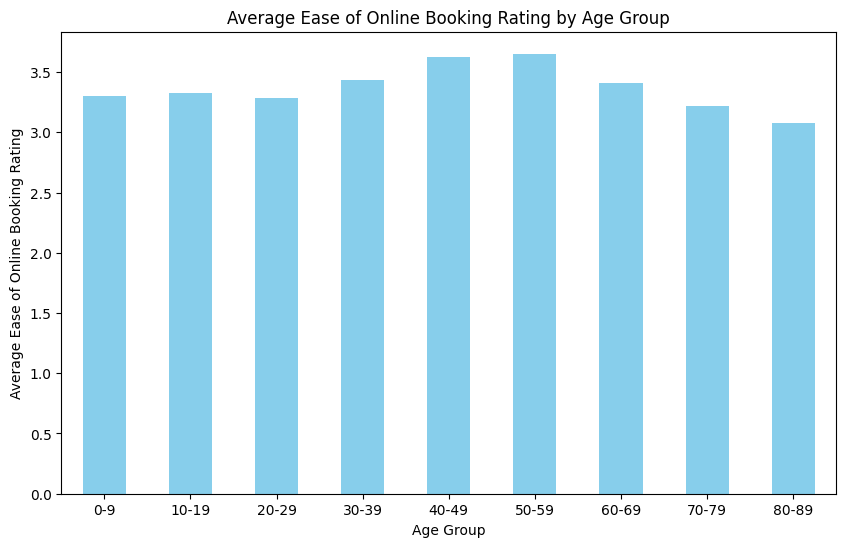

<Figure size 1200x600 with 0 Axes>

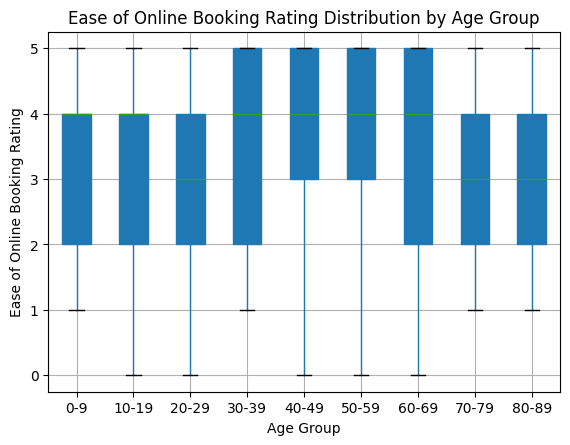

In [31]:
# Create age bins to categorize customers into age groups
age_bins = list(range(0, 100, 10))  
age_labels = [f"{i}-{i+9}" for i in age_bins[:-1]]  

# Assign each customer to an age group
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the average 'Ease of Online booking' rating for each age group
age_group_booking_avg = df.groupby('Age Group')['Ease of Online booking'].mean()
print(age_group_booking_avg)

#Create a bar chart
plt.figure(figsize=(10, 6))
age_group_booking_avg.plot(kind='bar', color='skyblue')

# Add labels and title to the bar chart
plt.title('Average Ease of Online Booking Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Ease of Online Booking Rating')

# Keep x-axis labels horizontal for readability
plt.xticks(rotation=360)

plt.show()

# Create a box plot to show the distribution of ratings by age group
plt.figure(figsize=(12, 6))
df.boxplot(column='Ease of Online booking', by='Age Group', patch_artist=True)

# Add labels and title to the box plot
plt.title('Ease of Online Booking Rating Distribution by Age Group')
plt.suptitle('')  # Removes the default 'Boxplot grouped by Age Group' title
plt.xlabel('Age Group')
plt.ylabel('Ease of Online Booking Rating')

plt.show()

Analysis 6: Can satisfaction be predicted by passenger demographics and behavior?

In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd 
import numpy as np

# Convert categorical variables into numeric representations
df['gender_num'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['CustomerType_num'] = df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
df['TravelType_num'] = df['Type of Travel'].map({'Personal Travel': 1, 'Business travel': 0})
df['satisfaction_num'] = df['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

# One-hot encode the 'Class' column (e.g., Eco, Eco Plus, Business)
class_dummies = pd.get_dummies(df['Class'])

# Combine all feature columns into a single DataFrame
x_values = pd.concat([
    df[['gender_num', 'CustomerType_num', 'Age', 'TravelType_num', 'Flight Distance']],
    class_dummies
], axis=1)

# Target variable: satisfaction (0 = dissatisfied, 1 = satisfied)
y_values = df['satisfaction_num']

# Split data into training (80%) and test (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=0)

# Train a logistic regression model using the training data
reg = LogisticRegression(max_iter=1000).fit(x_train, y_train)

# Output the model coefficients (feature importance)
print("Model coefficients: " + str(reg.coef_))

# Output the intercept (bias term)
print("Intercept (B value): " + str(reg.intercept_))

# Predict satisfaction using the test data
y_pred = reg.predict(x_test)

# Evaluate the model's accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy on Test Set: {:.2f}".format(accuracy))


Model coefficients: [[-1.09411157e+00  1.93490680e+00 -3.40528858e-03 -2.71741776e-01
  -1.50415238e-04  7.84412537e-01 -5.30671174e-01 -6.51598483e-01]]
Intercept (B value): [-0.39831446]
Model Accuracy on Test Set: 0.75


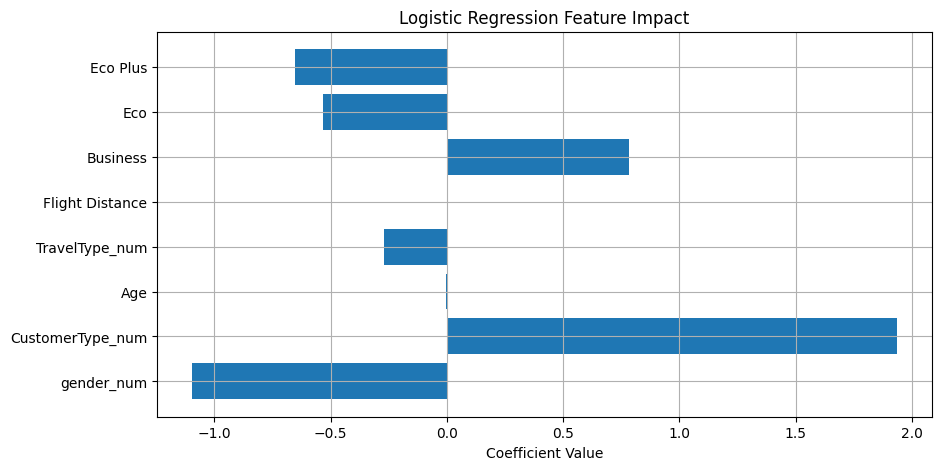

In [33]:
# Get the feature names from the input variables
feature_names = list(x_values.columns)

# Extract the coefficients from the logistic regression model
coefficients = reg.coef_[0]

# Create a horizontal bar chart to visualize the feature impact
plt.figure(figsize=(10,5))
plt.barh(feature_names, coefficients)

# Add labels and title to the plot
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Feature Impact")
plt.grid(True)
plt.show()
